https://github.com/nilmtk/nilmtk-contrib/issues/19
https://github.com/nilmtk/nilmtk-contrib/issues/35

mamba create -n nilm -c conda-forge -c nilmtk nilmtk-contrib tensorflow=2.3

https://github.com/conda-forge/miniforge#mambaforge

mamba deactivate
mamba env remove --name nilm

mamba create -n nilm_0.4.3 -c conda-forge -c nilmtk nilmtk=0.4.3 nilmtk-contrib tensorflow=2.2 keras=2.3 matplotlib-base=3.1 python=3.7 -y

conda activate nilm

jupyter notebook
jupyter notebook --no-browser --port=80

In [1]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

ukdale = DataSet('./data/ukdale.h5')
#iawe = DataSet('/data/iawe.h5')

print_dict(ukdale.metadata)
print_dict(ukdale.buildings)

In [1]:
!pip show nilmtk
!pip show tensorflow #<2.3
!pip show nilmtk-contrib
!pip show numpy
!pip show pandas
!pip show networkx
!pip show scipy
!pip show scikit-learn
!pip show h5py #2.10
!pip show keras #<2.4

Name: nilmtk
Version: 0.4.0.dev1+git.303d45b
Summary: Estimate the energy consumed by individual appliances from whole-house power meter readings
Home-page: https://github.com/nilmtk/nilmtk
Author: NILMTK developers
Author-email: UNKNOWN
License: Apache 2.0
Location: /home/hb/mambaforge/envs/nilm/lib/python3.7/site-packages
Requires: pandas, numpy, networkx, scipy, tables, scikit-learn, hmmlearn, pyyaml, matplotlib, jupyterlab
Required-by: nilmtk-contrib
Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/hb/mambaforge/envs/nilm/lib/python3.7/site-packages
Requires: grpcio, wheel, numpy, opt-einsum, h5py, keras-preprocessing, protobuf, astunparse, tensorflow-estimator, gast, absl-py, six, termcolor, scipy, google-pasta, tensorboard, wrapt
Required-by: 
Name: nilmtk-contrib
Version: 0.1.1
Summary: 

In [2]:
from nilmtk.disaggregate import Mean,CO,Hart85
# from nilmtk_contrib.disaggregate import AFHMM,AFHMM_SAC,DSC,RNN,Seq2Point,Seq2Seq,DAE,WindowGRU
from nilmtk_contrib.disaggregate import RNN,Seq2Point,WindowGRU

Using TensorFlow backend.


In [5]:
d = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'display_predictions': True,
  'appliances': ['washing machine'],
  'methods': {
      'Mean':Mean({}),
      "CO":CO({}),
      'Hart85':Hart85({}),
      #'RNN':RNN({'n_epochs':50,'batch_size':1024}),
      'Seq2Point':Seq2Point({'n_epochs':50,'batch_size':1024})
      #'Seq2Seq':Seq2Seq({'n_epochs':50,'batch_size':1024}),
      #'WindowGRU':WindowGRU({'n_epochs':30,'batch_size':1024})
  },
 'train': {
    'datasets': {
      'UKDALE': {
        'path': './data/ukdale.h5',
        'buildings': {
              1: {
                'start_time': '2017-01-05',
                'end_time': '2017-03-05'
              },
          
        }
      },
        
    }
  },
    
  'test': {
    'datasets': {
      'REDD': {
        'path': './data/redd.h5',
        'buildings': {
              1: {
                    'start_time': '2011-04-17',
                    'end_time': '2011-04-27'
          }
        }
      }
    },
    'metrics':['rmse', 'mae', 'relative_error', 'r2score', 'nde', 'nep', 'f1score']
  }
}

Joint Testing for all algorithms
Loading data for  REDD  dataset
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : Mean
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Hart85g machine'
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Generating predictions for : Seq2Point
............  rmse  ..............
                       Mean         CO      Hart85   Seq2Point
washing machine  240.490994  475.31146  244.148224  207.017832
............  mae  ..............
                      Mean          CO     Hart85  Seq2Point
washing machine  48.78910

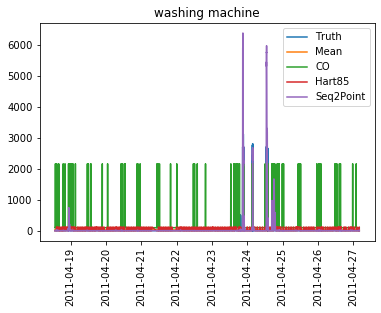

In [6]:

api_res = API(d)


In [7]:
api_res.errors

[                       Mean         CO      Hart85   Seq2Point
 washing machine  240.490994  475.31146  244.148224  207.017832,
                       Mean          CO     Hart85  Seq2Point
 washing machine  48.789108  195.819748  56.424557   21.91486,
                      Mean        CO     Hart85  Seq2Point
 washing machine  1.852197  0.987797  12.936861   0.281678,
                      Mean        CO   Hart85  Seq2Point
 washing machine -0.000024 -2.906333 -0.03067   0.258983,
                      Mean        CO    Hart85  Seq2Point
 washing machine  0.994999  1.966537  1.010131   0.856508,
                      Mean        CO   Hart85  Seq2Point
 washing machine  2.018575  8.101744  2.33448   0.906694,
                     Mean       CO    Hart85  Seq2Point
 washing machine  0.02435  0.02435  0.036135   0.393632]

In [8]:
api_res.errors_keys

['REDD_1_rmse',
 'REDD_1_mae',
 'REDD_1_relative_error',
 'REDD_1_r2score',
 'REDD_1_nde',
 'REDD_1_nep',
 'REDD_1_f1score']